In [1]:
#imprting neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import zscore
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')


In [2]:
#reading data from github link
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
#checking no of columns
columns=df.columns
columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

There are 12 columns
we are going to predict the quality of wine based on features value, hence quality is dependent variable

In [4]:
#lets identify the number of classes present in label
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

there are 6(class) quality levels of wines

In [5]:
#have a look on metadata of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


1)we can see as of now there no null values
2)all features are have same data type
3)label have integer data type

In [6]:
#checking null values are present or not
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

No null value present

lets check how the individual columns have unique data

In [7]:
for i in columns:
 print( df[i].value_counts())

7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: fixed acidity, Length: 96, dtype: int64
0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
1.035     1
0.565     1
1.130     1
1.115     1
1.090     1
Name: volatile acidity, Length: 143, dtype: int64
0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
0.72      1
0.62      1
0.75      1
1.00      1
0.78      1
Name: citric acid, Length: 80, dtype: int64
2.00     156
2.20     131
1.80     129
2.10     128
1.90     117
        ... 
4.25       1
2.85       1
3.45       1
2.35       1
13.90      1
Name: residual sugar, Length: 91, dtype: int64
0.080    66
0.074    55
0.076    51
0.078    51
0.084    49
         ..
0.108     1
0.148     1
0.143     1
0.222     1
0.230     1
Name: chlorides, Length: 153, dtype: int64
6.0     138
5.0     104
10.0     79
15.0     78
12.0     75
7.0      71
9.0      62
16.0     61
17.0     60
11

features have well number of unique values

most data lies under quality levels between 5-7 so there is a class imbalance problem

In [8]:
#lets check is there any space data?
for i in columns:
  print(i)
  i=df[i]==' '
  print(i.unique())


fixed acidity
[False]
volatile acidity
[False]
citric acid
[False]
residual sugar
[False]
chlorides
[False]
free sulfur dioxide
[False]
total sulfur dioxide
[False]
density
[False]
pH
[False]
sulphates
[False]
alcohol
[False]
quality
[False]


No true is present in any columns unique value so there is no space data points in dataframe

In [9]:
print(df['citric acid'].isna().sum())

0


the data in  residual suger, chlorides, sulphates, alcohole have skewned

In [10]:
#lets describe the data
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


1)the mean of fixed acidity, residual suiger, chlorides,free sulfur dioxide,total sulfur dioxide,sulphates are greater than median
2) we can see there is a  difference between 75% and max of fixed acidity,volatile acidity,citric acid,residual suger,chlorides,free sulfer dioxide,total sulfur dioxide,sulphates

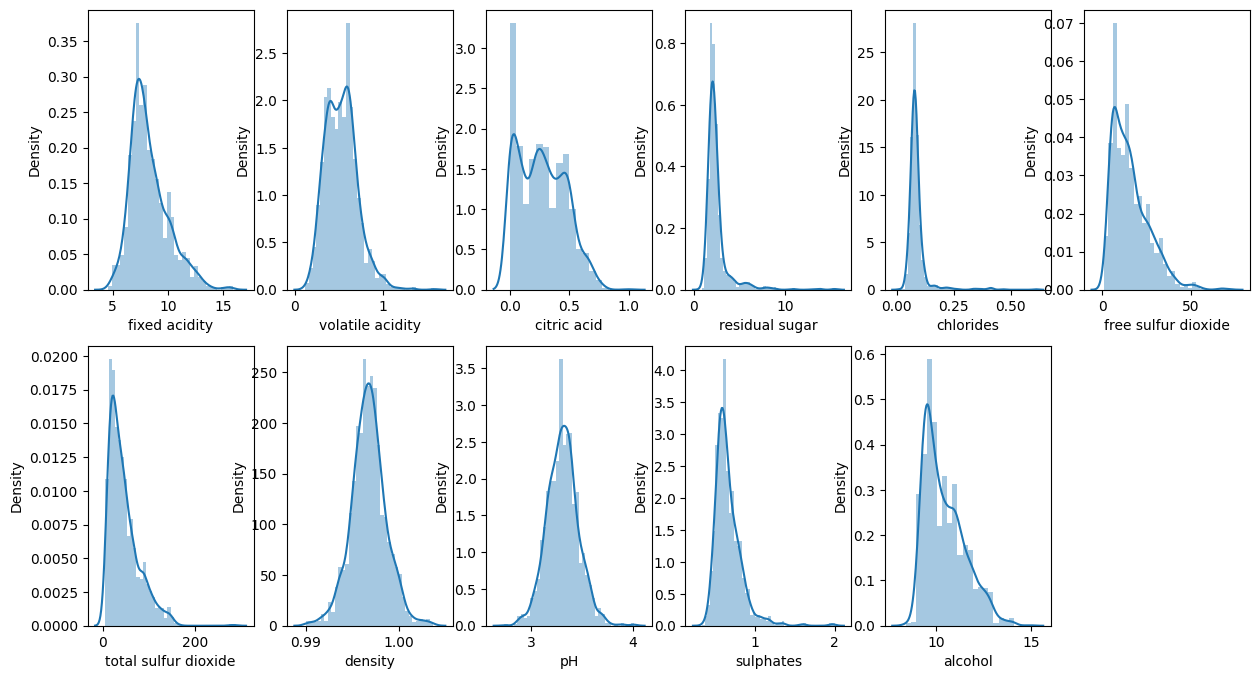

In [11]:
#plotting distribuation plots of all features
plt.figure(figsize=(15,8))
plotno=1
colno=0
while True :
  ax=plt.subplot(2,6,plotno)
  sns.distplot(df[columns[colno]])
  plotno+=1
  colno+=1
  if plotno==12:
    break
plt.show()

residual suger skewd right side,   
total sulfur dioxide skewed right side,  
chlorides skewed right side ,  
free sulfur dioxide skewed right side,  
sulphates skewed right side,  
volitile a cidityand fixed acidity also slightly skewed towards right   
some featuires have right skewness in small ammount and some are heavily skewed

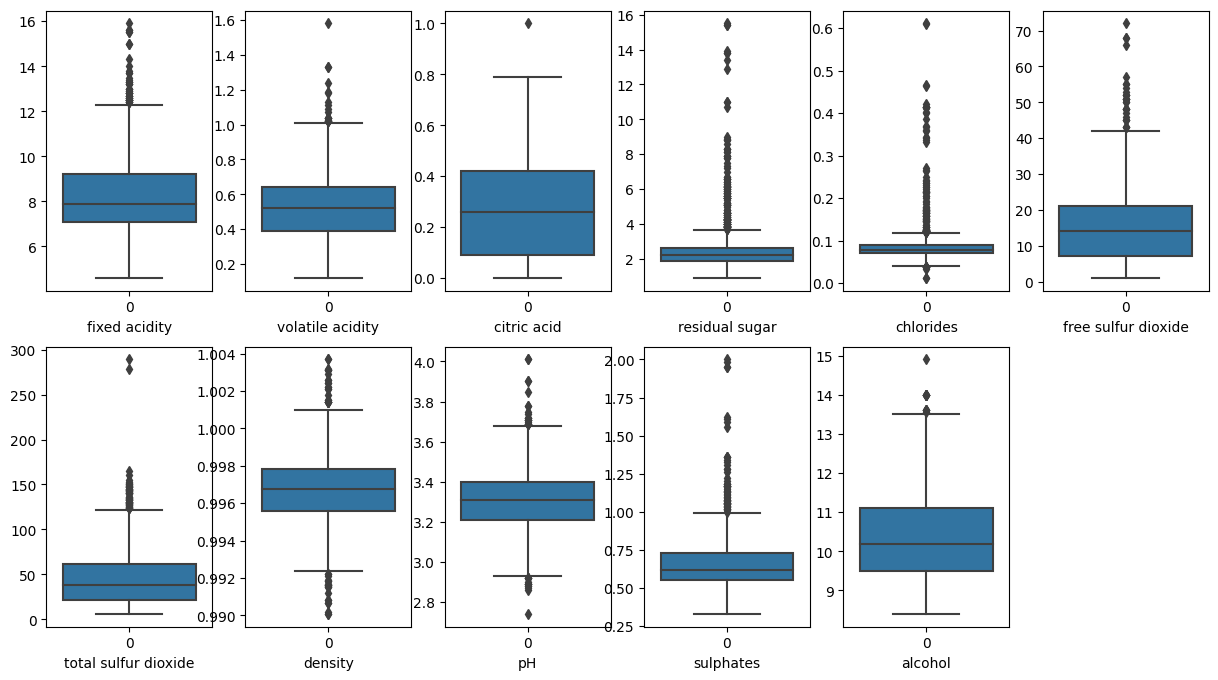

In [12]:
plt.figure(figsize=(15,8))
plotno=1
colno=0
while True :
  ax=plt.subplot(2,6,plotno)
  sns.boxplot(df[columns[colno]])
  plt.xlabel(columns[colno])
  plotno+=1
  colno+=1
  if plotno==12:
    break
plt.show()

In [13]:
z_score=zscore(df[['fixed acidity','volatile acidity','residual sugar','chlorides','density','pH','sulphates']])
absulate_score=np.abs(z_score)
ind=(absulate_score<4).all(axis=1)
df=df[ind]

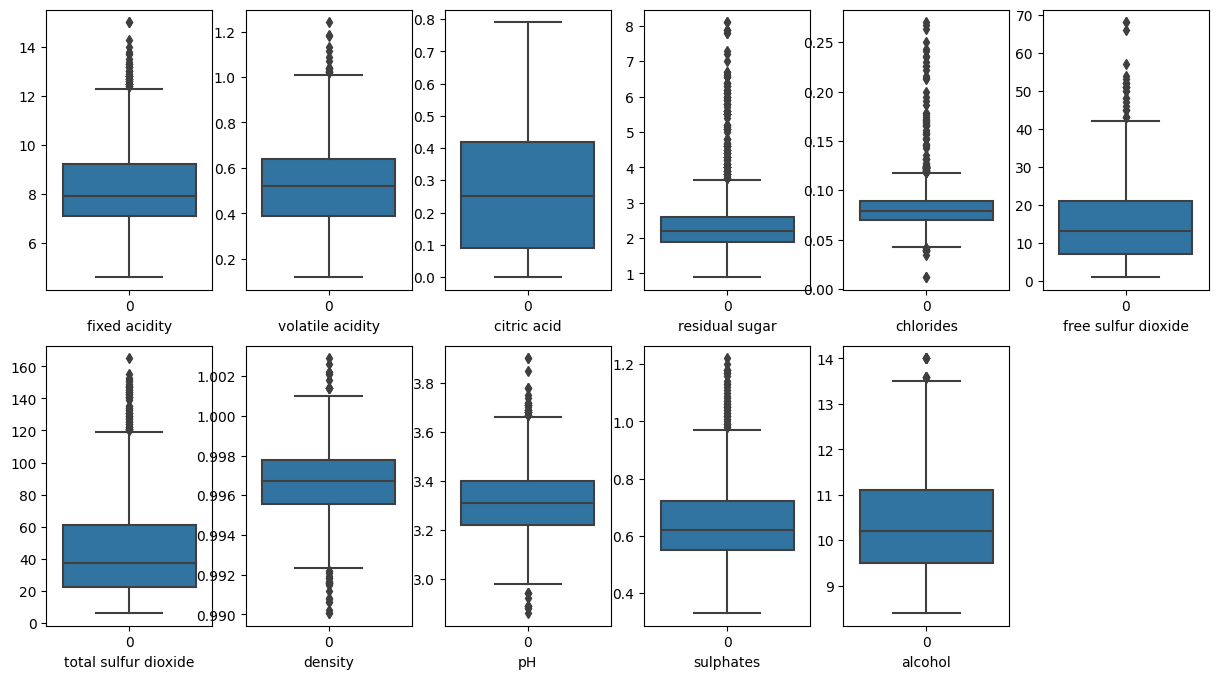

In [14]:
plt.figure(figsize=(15,8))
plotno=1
colno=0
while True :
  ax=plt.subplot(2,6,plotno)
  sns.boxplot(df[columns[colno]])
  plt.xlabel(columns[colno])
  plotno+=1
  colno+=1
  if plotno==12:
    break
plt.show()

In [15]:
#checking skewness
df.skew()

fixed acidity           0.871629
volatile acidity        0.493781
citric acid             0.296279
residual sugar          2.677640
chlorides               2.972214
free sulfur dioxide     1.177786
total sulfur dioxide    1.195697
density                -0.096364
pH                      0.214717
sulphates               1.020560
alcohol                 0.837434
quality                 0.233818
dtype: float64

In [16]:
skewed_featuers=['fixed acidity','volatile acidity','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','sulphates','alcohol']

In [17]:
for i in skewed_featuers:
  df[i]=np.log(df[i])

In [18]:
#lets check how much skewness removed
df.skew()

fixed acidity           0.352123
volatile acidity       -0.487074
citric acid             0.296279
residual sugar          1.311744
chlorides               0.323029
free sulfur dioxide    -0.239034
total sulfur dioxide   -0.085451
density                -0.096364
pH                      0.214717
sulphates               0.407283
alcohol                 0.647209
quality                 0.233818
dtype: float64

good amount of skewnees has removed lets have look on distribuation

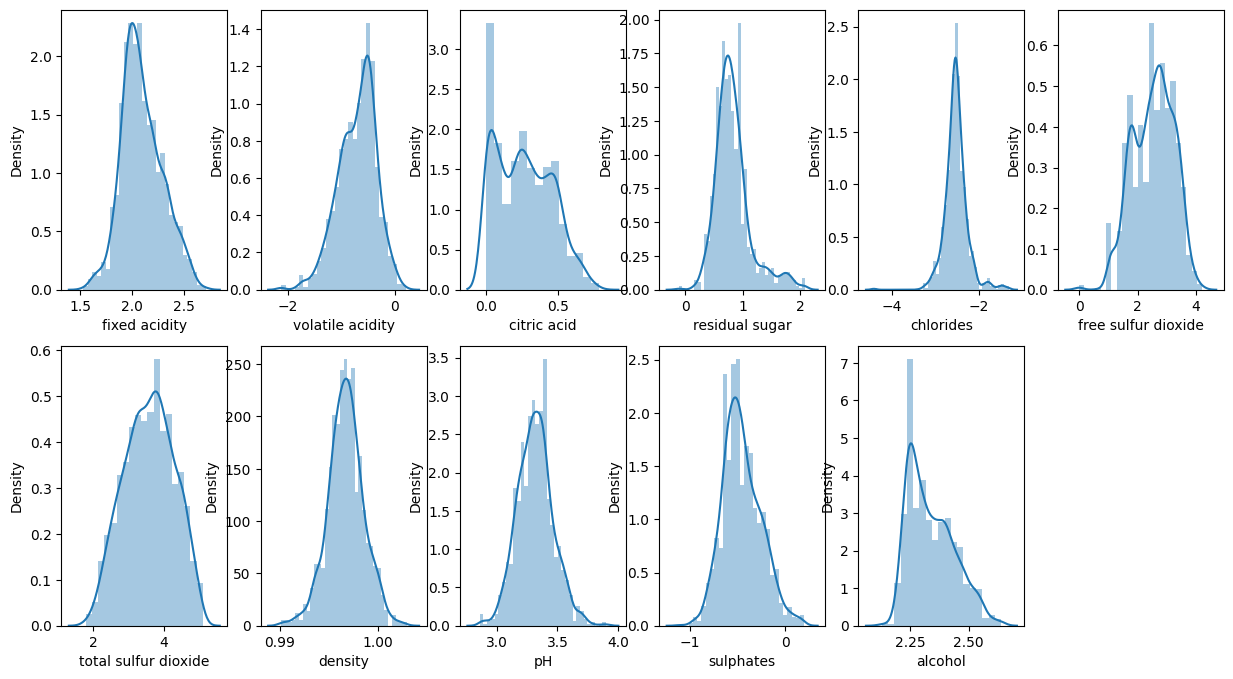

In [19]:
#plotting distribuation plots of all features
plt.figure(figsize=(15,8))
plotno=1
colno=0
while True :
  ax=plt.subplot(2,6,plotno)
  sns.distplot(df[columns[colno]])
  plotno+=1
  colno+=1
  if plotno==12:
    break
plt.show()

In [20]:
#checking correlation
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.280701,0.686527,0.177235,0.218887,-0.181701,-0.112764,0.671790,-0.723057,0.200660,-0.096830,0.122920
volatile acidity,-0.280701,1.000000,-0.578594,0.090790,0.157433,0.050845,0.117501,0.052085,0.229904,-0.333291,-0.239432,-0.392108
citric acid,0.686527,-0.578594,1.000000,0.161534,0.094193,-0.110568,-0.026536,0.366268,-0.525395,0.310035,0.133812,0.239777
residual sugar,0.177235,0.090790,0.161534,1.000000,0.186169,0.057012,0.127008,0.403624,-0.064920,0.063248,0.095758,0.011225
chlorides,0.218887,0.157433,0.094193,0.186169,1.000000,-0.036502,0.071221,0.400715,-0.200547,0.050269,-0.285826,-0.179349
free sulfur dioxide,-0.181701,0.050845,-0.110568,0.057012,-0.036502,1.000000,0.784221,-0.052179,0.124062,0.033647,-0.078405,-0.059554
total sulfur dioxide,-0.112764,0.117501,-0.026536,0.127008,0.071221,0.784221,1.000000,0.114293,0.021944,0.011737,-0.245307,-0.184800
density,0.671790,0.052085,0.366268,0.403624,0.400715,-0.052179,0.114293,1.000000,-0.326497,0.158977,-0.499134,-0.182689
pH,-0.723057,0.229904,-0.525395,-0.064920,-0.200547,0.124062,0.021944,-0.326497,1.000000,-0.039036,0.190136,-0.072111
sulphates,0.200660,-0.333291,0.310035,0.063248,0.050269,0.033647,0.011737,0.158977,-0.039036,1.000000,0.223140,0.371459


<Axes: >

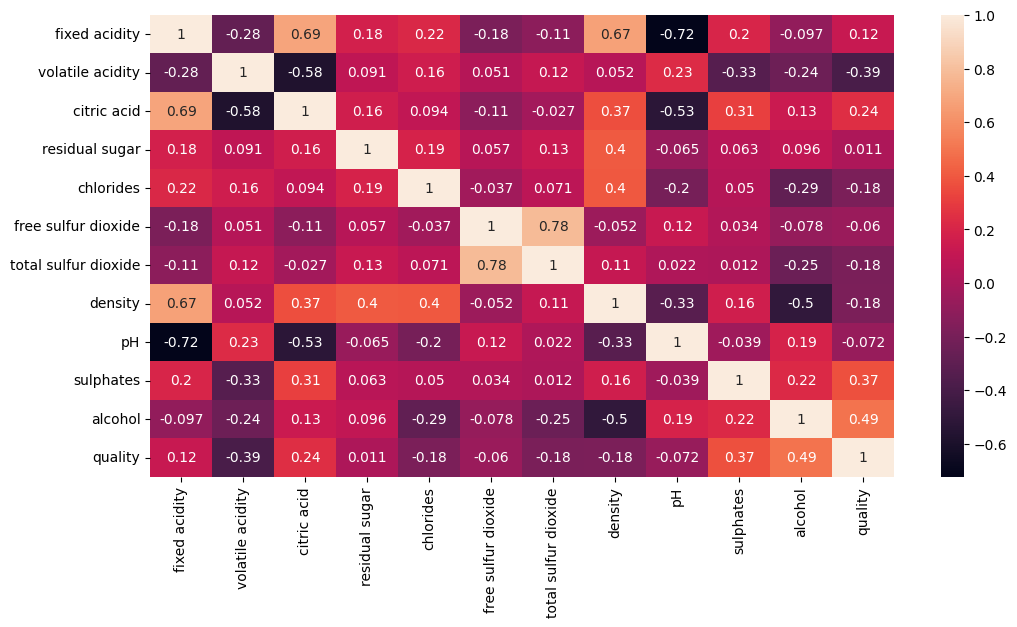

In [21]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True)

1)free sulfur dioxide and total sulfur dioxide are correlated positively ,  
2)density and fixed acidity correlated positively  
3)ph and fixed acidity correlated inversely

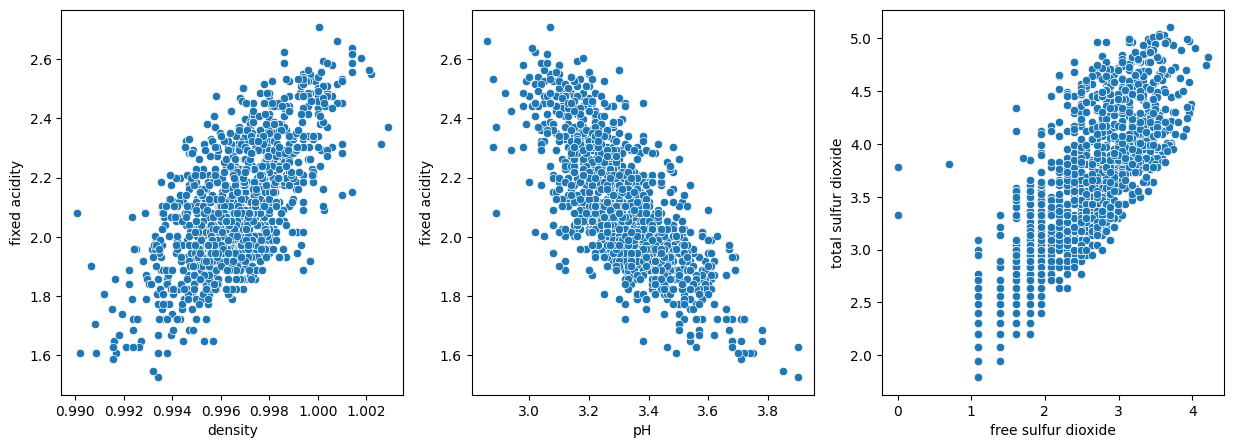

In [22]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)

sns.scatterplot(x=df['density'],y=df['fixed acidity'])
plt.subplot(1,3,2)
sns.scatterplot(x=df['pH'],y=df['fixed acidity'])
plt.subplot(1,3,3)
sns.scatterplot(x=df['free sulfur dioxide'],y=df['total sulfur dioxide'])

plt.show()

we are dropping ph as it is correlated with fixed acidit and not strong relation with quality,      
 and free sulfur dioxide correlated with total sulfur diosixe and also not strong relation with label

outliers are  present in fixed acidity, residual suger,clorides,density,ph,sulphates

In [23]:
df.shape

(1540, 12)

data distribuation looks perfect but we lost alot data lets look how we get performense on this data if there any need to reduce the data loss then we will come back an increase the range of abs score

In [24]:
#lets detach features and label
x=df.drop('quality',axis=1)
y=df['quality']

In [25]:
#again checking multicolinearity of features by vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['feature_value']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['feature']=x.columns
vif

,feature_value,feature
0,401.252494,fixed acidity
1,9.220796,volatile acidity
2,8.946181,citric acid
3,9.450069,residual sugar
4,115.895492,chlorides
5,42.668600,free sulfur dioxide
6,86.456068,total sulfur dioxide
7,3232.805468,density
8,1209.424303,pH
9,7.686022,sulphates


Here we can see that the score of density and pH are too high also we had seen in graphical representation that they are correlated with fixed acidity,
we are deleting density and pH as they are not highly contributing as compare to fixed acidity

In [26]:
x=x.drop(columns=['density','pH'],axis=1)

In [27]:
vif=pd.DataFrame()
vif['feature_value']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['feature']=x.columns
vif

,feature_value,feature
0,147.450476,fixed acidity
1,9.146062,volatile acidity
2,7.415440,citric acid
3,9.349097,residual sugar
4,113.899875,chlorides
5,41.284771,free sulfur dioxide
6,71.054921,total sulfur dioxide
7,7.082243,sulphates
8,255.058395,alcohol


In [28]:
#resampling
resamp=SMOTE()
x,y=resamp.fit_resample(x,y)

In [29]:
y.value_counts()

5    655
6    655
7    655
4    655
8    655
3    655
Name: quality, dtype: int64

In [30]:
#feature scaling
scaler=StandardScaler()
x_scal=scaler.fit_transform(x)

**MODEL BUILDING**

In [31]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,BaggingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report

In [32]:
maxscr=0
ind=0
x_train_rnd=None
y_train_rnd=None
x_test_rnd=None
y_test_rnd=None
for i in range(19,21):
  x_train,x_test,y_train,y_test=train_test_split(x_scal,y,test_size=0.25,random_state=i)
  rfc=SVC()
  rfc.fit(x_train,y_train)
  scr=accuracy_score(y_test,rfc.predict(x_test))
  if scr > maxscr:
    maxscr=scr
    ind=i
    x_train_rnd=x_train
    y_train_rnd=y_train
    x_test_rnd=x_test
    y_test_rnd=y_test
print('highest score at random state: ',i,'with score: ', maxscr)


highest score at random state:  20 with score:  0.7772126144455748


In [33]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
def model_build(model_name,features,label):
  model_name.fit(features,label)
  y_pred=model_name.predict(x_test_rnd)
  print('--------training score------------')
  print(accuracy_score(label,model_name.predict(features)))
  print('******************score************************')
  print(accuracy_score(y_test_rnd,y_pred))
  print('-------------------------')
  print(confusion_matrix(y_test_rnd,y_pred))
  print('----------classification report----------------')
  print(classification_report(y_test_rnd,y_pred))




In [34]:
rfc=RandomForestClassifier()
model_build(rfc,x_train_rnd,y_train_rnd)

--------training score------------
1.0
******************score************************
0.8535096642929807
-------------------------
[[165   0   0   0   0   0]
 [  2 144  10   0   0   0]
 [  1  10 108  28   5   0]
 [  2  10  34 101  23   5]
 [  0   0   0  13 160   0]
 [  0   0   0   0   1 161]]
----------classification report----------------
              precision    recall  f1-score   support

           3       0.97      1.00      0.99       165
           4       0.88      0.92      0.90       156
           5       0.71      0.71      0.71       152
           6       0.71      0.58      0.64       175
           7       0.85      0.92      0.88       173
           8       0.97      0.99      0.98       162

    accuracy                           0.85       983
   macro avg       0.85      0.85      0.85       983
weighted avg       0.85      0.85      0.85       983



In [35]:
svc=SVC()
model_build(svc,x_train_rnd,y_train_rnd)

--------training score------------
0.8160841533763149
******************score************************
0.7772126144455748
-------------------------
[[165   0   0   0   0   0]
 [  6 139  10   0   1   0]
 [  8  24  86  28   6   0]
 [  4  16  35  77  32  11]
 [  1   2   1  15 137  17]
 [  0   0   0   0   2 160]]
----------classification report----------------
              precision    recall  f1-score   support

           3       0.90      1.00      0.95       165
           4       0.77      0.89      0.82       156
           5       0.65      0.57      0.61       152
           6       0.64      0.44      0.52       175
           7       0.77      0.79      0.78       173
           8       0.85      0.99      0.91       162

    accuracy                           0.78       983
   macro avg       0.76      0.78      0.77       983
weighted avg       0.76      0.78      0.76       983



In [36]:
knn=KNeighborsClassifier()
model_build(knn,x_train_rnd,y_train_rnd)

--------training score------------
0.8601968103155752
******************score************************
0.7863682604272635
-------------------------
[[165   0   0   0   0   0]
 [  3 150   2   1   0   0]
 [  7  27  77  30   9   2]
 [  9  21  31  62  35  17]
 [  0   2   1   7 160   3]
 [  0   0   0   0   3 159]]
----------classification report----------------
              precision    recall  f1-score   support

           3       0.90      1.00      0.95       165
           4       0.75      0.96      0.84       156
           5       0.69      0.51      0.59       152
           6       0.62      0.35      0.45       175
           7       0.77      0.92      0.84       173
           8       0.88      0.98      0.93       162

    accuracy                           0.79       983
   macro avg       0.77      0.79      0.77       983
weighted avg       0.77      0.79      0.76       983



In [37]:
dt=DecisionTreeClassifier()
model_build(dt,x_train_rnd,y_train_rnd)

--------training score------------
1.0
******************score************************
0.8056968463886063
-------------------------
[[157   3   2   3   0   0]
 [  4 134  10   8   0   0]
 [  4  15  99  28   5   1]
 [  3  11  33 100  25   3]
 [  0   1   6  19 145   2]
 [  0   0   0   2   3 157]]
----------classification report----------------
              precision    recall  f1-score   support

           3       0.93      0.95      0.94       165
           4       0.82      0.86      0.84       156
           5       0.66      0.65      0.66       152
           6       0.62      0.57      0.60       175
           7       0.81      0.84      0.83       173
           8       0.96      0.97      0.97       162

    accuracy                           0.81       983
   macro avg       0.80      0.81      0.80       983
weighted avg       0.80      0.81      0.80       983



In [38]:
gdb=GradientBoostingClassifier()
model_build(gdb,x_train_rnd,y_train_rnd)

--------training score------------
0.9168646080760094
******************score************************
0.8046795523906409
-------------------------
[[165   0   0   0   0   0]
 [  2 136   9   8   1   0]
 [  3  14  96  36   3   0]
 [  4   8  35  87  34   7]
 [  0   2   0  17 150   4]
 [  0   0   0   0   5 157]]
----------classification report----------------
              precision    recall  f1-score   support

           3       0.95      1.00      0.97       165
           4       0.85      0.87      0.86       156
           5       0.69      0.63      0.66       152
           6       0.59      0.50      0.54       175
           7       0.78      0.87      0.82       173
           8       0.93      0.97      0.95       162

    accuracy                           0.80       983
   macro avg       0.80      0.81      0.80       983
weighted avg       0.80      0.80      0.80       983



In [39]:
bg=BaggingClassifier()
model_build(bg,x_train_rnd,y_train_rnd)

--------training score------------
0.995588734306074
******************score************************
0.8250254323499492
-------------------------
[[159   3   2   1   0   0]
 [  3 142   7   3   1   0]
 [  4  16  99  30   3   0]
 [  2  14  28 101  26   4]
 [  0   2   4  13 154   0]
 [  0   0   0   0   6 156]]
----------classification report----------------
              precision    recall  f1-score   support

           3       0.95      0.96      0.95       165
           4       0.80      0.91      0.85       156
           5       0.71      0.65      0.68       152
           6       0.68      0.58      0.63       175
           7       0.81      0.89      0.85       173
           8       0.97      0.96      0.97       162

    accuracy                           0.83       983
   macro avg       0.82      0.83      0.82       983
weighted avg       0.82      0.83      0.82       983



**Cross valiadtion**

In [40]:
from sklearn.model_selection import cross_val_score
def cross_check(model,x_scal,y,n):
  cv=cross_val_score(model,x_scal,y,cv=n)
  print(cv)
  print("%2.2f"%(np.mean(cv)*100))

  print('difference between model accuracy score and cross validation scor is : %2.2f '%((accuracy_score(y_test_rnd,model.predict(x_test_rnd))-np.mean(cv))*100))

In [41]:
#cross validation of random forest classifier
cross_check(rfc,x_scal,y,20)

[0.81218274 0.79187817 0.82741117 0.88324873 0.80203046 0.82233503
 0.81725888 0.85279188 0.84263959 0.83248731 0.82653061 0.80612245
 0.84693878 0.81122449 0.83673469 0.85714286 0.87244898 0.82142857
 0.88265306 0.85204082]
83.49
difference between model accuracy score and cross validation scor is : 1.86 


In [42]:
#cross validation of support vector classifier
cross_check(svc,x_scal,y,20)

[0.74111675 0.77664975 0.83756345 0.83248731 0.73096447 0.73096447
 0.75126904 0.78172589 0.73604061 0.72081218 0.73979592 0.71938776
 0.82142857 0.71938776 0.76020408 0.80612245 0.80612245 0.76530612
 0.77040816 0.75      ]
76.49
difference between model accuracy score and cross validation scor is : 1.23 


In [43]:
#cross validation of Kneighbors classifier
cross_check(knn,x_scal,y,20)

[0.74111675 0.77664975 0.76142132 0.82741117 0.74111675 0.76142132
 0.76649746 0.76649746 0.7715736  0.80203046 0.76530612 0.77040816
 0.80102041 0.76020408 0.75510204 0.75510204 0.82142857 0.72959184
 0.79081633 0.84693878]
77.56
difference between model accuracy score and cross validation scor is : 1.08 


In [44]:
#cross validation of decision tree
cross_check(dt,x_scal,y,20)

[0.70050761 0.74619289 0.75126904 0.8071066  0.73604061 0.78680203
 0.79695431 0.77664975 0.70558376 0.75634518 0.7755102  0.75
 0.81122449 0.75       0.79591837 0.74489796 0.78061224 0.78061224
 0.79591837 0.78061224]
76.64
difference between model accuracy score and cross validation scor is : 3.93 


In [45]:
#cross validation of GradientBoostingClassifier
cross_check(gdb,x_scal,y,5)

[0.79643766 0.76463104 0.75826972 0.82061069 0.79389313]
78.68
difference between model accuracy score and cross validation scor is : 1.79 


In [46]:
#cross validation of BaggingClassifier
cross_check(bg,x_scal,y,20)

[0.7715736  0.79187817 0.79187817 0.83756345 0.76649746 0.79695431
 0.78680203 0.83756345 0.77664975 0.82233503 0.81122449 0.81122449
 0.83163265 0.79081633 0.82653061 0.83163265 0.79591837 0.78061224
 0.83163265 0.81632653]
80.54
difference between model accuracy score and cross validation scor is : 1.97 


as knn has least difference so it is our best model

In [47]:
#hyperparameter tuning
from sklearn.model_selection import GridSearchCV

para_grid={'algorithm':['ball_tree','kd_tree','brute'],
           'n_neighbors':[1,2,3,4,5,6],
           'leaf_size':[30,50,100],
           'p':[1,2],
           'n_jobs':[1,2]

          }
tune=GridSearchCV(knn,param_grid=para_grid,cv=5)

In [48]:
tune.fit(x_train_rnd,y_train_rnd)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [30, 50, 100], 'n_jobs': [1, 2],
                         'n_neighbors': [1, 2, 3, 4, 5, 6], 'p': [1, 2]})

In [49]:
tune.best_params_

{'algorithm': 'ball_tree',
 'leaf_size': 30,
 'n_jobs': 1,
 'n_neighbors': 1,
 'p': 1}

In [50]:
tuneknn=KNeighborsClassifier(algorithm='ball_tree',n_neighbors=1)
tuneknn.fit(x_train_rnd,y_train_rnd)
y_pred=tuneknn.predict(x_test_rnd)
print('******************score************************')
print(accuracy_score(y_test_rnd,y_pred))
print('-------------------------')
print(confusion_matrix(y_test_rnd,y_pred))
print('----------classification report----------------')
print(classification_report(y_test_rnd,y_pred))

******************score************************
0.8494404883011191
-------------------------
[[165   0   0   0   0   0]
 [  0 154   1   1   0   0]
 [  3  17  96  31   5   0]
 [  3  10  29  92  34   7]
 [  0   2   1   1 167   2]
 [  0   0   0   0   1 161]]
----------classification report----------------
              precision    recall  f1-score   support

           3       0.96      1.00      0.98       165
           4       0.84      0.99      0.91       156
           5       0.76      0.63      0.69       152
           6       0.74      0.53      0.61       175
           7       0.81      0.97      0.88       173
           8       0.95      0.99      0.97       162

    accuracy                           0.85       983
   macro avg       0.84      0.85      0.84       983
weighted avg       0.84      0.85      0.84       983



In [72]:
#lets save model
import pickle

In [73]:
pickle.dump(knn,open('knn_for_winedata.sav','wb'))

In [75]:
knn_model=pickle.load(open('knn_for_winedata.sav','rb'))